In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
path = "./data/SergioIoppolo-November2023/20231104  hexane/"

In [3]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

bkgd_fname3 = path + "R73862.d01"
sample_fname3 = path + "R73874.d01"

bkgd_fname4 = path + "R73862.d02"
sample_fname4 = path + "R73874.d02"

### SingleScan objects

In [4]:
test_scan1 = tools.SingleScan(bkgd_fname1, sample_fname1)
test_scan2 = tools.SingleScan(bkgd_fname2, sample_fname2)
test_scan3 = tools.SingleScan(bkgd_fname3, sample_fname3)
test_scan4 = tools.SingleScan(bkgd_fname4, sample_fname4)

(-0.02, 0.8)

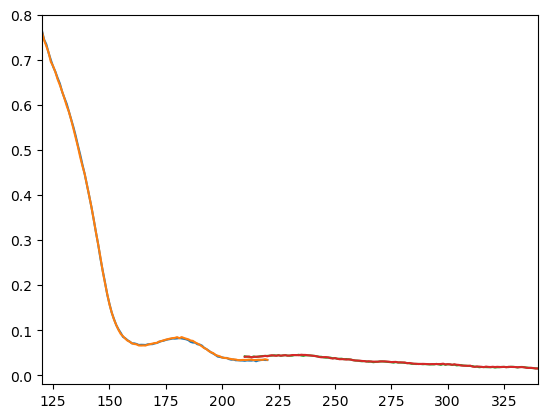

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(test_scan1.data['wavelength'], test_scan1.data['absorbance'])
ax.plot(test_scan2.data['wavelength'], test_scan2.data['absorbance'])
ax.plot(test_scan3.data['wavelength'], test_scan3.data['absorbance'])
ax.plot(test_scan4.data['wavelength'], test_scan4.data['absorbance'])

ax.set_xlim(120, 340)
ax.set_ylim(-0.02, 0.8)

### Spectrum objects

In [6]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

test_spectrum = tools.Spectrum()
test_spectrum.change_name("73873")
test_spectrum.add_bkgd(bkgd_fname1)
test_spectrum.add_bkgd(bkgd_fname2)
test_spectrum.add_sample(sample_fname1)
test_spectrum.add_sample(sample_fname2)
test_spectrum.change_color("#000001")
test_spectrum.change_offset(0.00001)
test_spectrum.average_scans()
#tools.plot_absorbance([test_spectrum])

In [7]:
#test_spectrum.flip_visibility()

In [8]:
test_spectrum.change_color("#FF0000")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


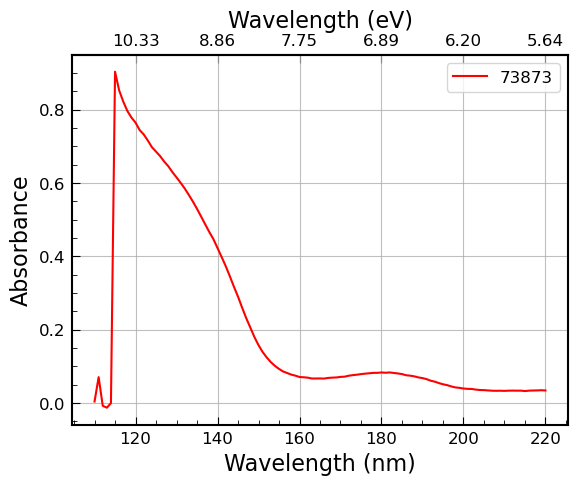

In [9]:
tools.plot_absorbance([test_spectrum])#, xlim=(120, 340), ylim=(-0.02, 0.8))

In [10]:
test_spectrum.data['absorbance']

0      0.003893
1      0.070372
2     -0.007720
3     -0.012925
4     -0.000565
         ...   
106    0.033585
107    0.033956
108    0.034200
109    0.034710
110    0.034000
Name: absorbance, Length: 111, dtype: float64

In [11]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

spec1 = tools.Spectrum()
spec1.change_name("73873")
spec1.add_bkgd(bkgd_fname1)
spec1.add_bkgd(bkgd_fname2)
spec1.add_sample(sample_fname1)
spec1.add_sample(sample_fname2)
spec1.change_color("#000001")
spec1.change_offset(0.0)
spec1.average_scans()
#tools.plot_absorbance([test_spectrum])


bkgd_fname1 = path + "R73862.d01"
sample_fname1 = path + "R73874.d01"

bkgd_fname2 = path + "R73862.d02"
sample_fname2 = path + "R73874.d02"

# action, pressing "ok" in the edit window:

spec2 = tools.Spectrum()
spec2.change_name("73874")
spec2.add_bkgd(bkgd_fname1)
spec2.add_bkgd(bkgd_fname2)
spec2.add_sample(sample_fname1)
spec2.add_sample(sample_fname2)
spec2.change_color("#000001")
spec2.change_offset(0.0)
spec2.average_scans()
#tools.plot_absorbance([test_spectrum])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


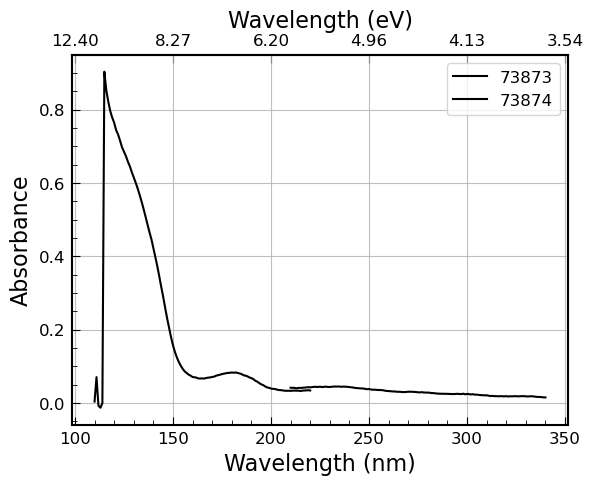

In [12]:
tools.plot_absorbance([spec1, spec2])

In [13]:
tester = tools.StichedSpectrum(spec1, spec2)

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


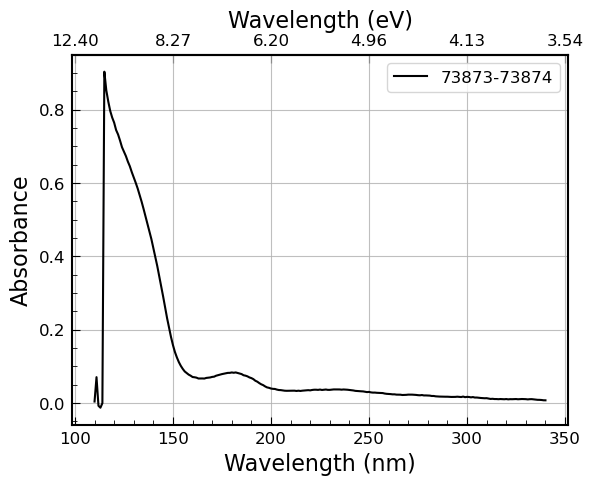

In [14]:
tools.plot_absorbance([tester])

In [15]:
tester.save_to_csv("./hexane_irradiation_1.csv")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


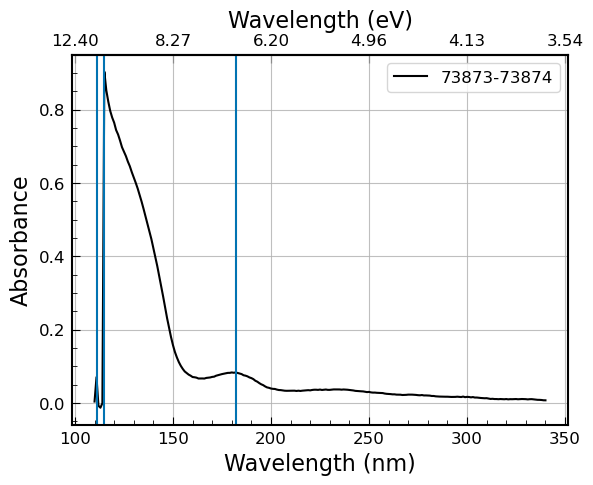

In [16]:
# note, this is not the most robust way to find the peaks.
# What you should do when you implement this, is fit the function
# with several asymmetric gaussians (must be asymmetric or it won't work)
# and then take the peaks of those gaussians. This is much more robust
# against noise, which in general might be high.

from scipy.signal import find_peaks
peaki = find_peaks(tester.data['absorbance'], prominence=0.005)
peaks = []
for i in peaki[0]:
    this_wl = tester.data['wavelength'][i]
    this_ab = tester.data['absorbance'][i]
    peaks.append([this_wl, this_ab])
    
tools.plot_absorbance([tester], peaks=peaks)

## Have a look at the oxy data why not

In [17]:
path = './data/AlessandraMigliorini-October2023/DATA_Oct2023/20231024    O2_CH3OH   Layer  VIS OK/'

In [18]:
spec = tools.Spectrum()
spec.change_name("73666")
spec.add_bkgd(path + "R73661.d01")
spec.add_bkgd(path + "R73661.d02")
spec.add_bkgd(path + "R73661.d03")
spec.add_bkgd(path + "R73661.d04")
spec.add_sample(path + "R73666.d01")
spec.add_sample(path + "R73666.d02")
spec.add_sample(path + "R73666.d03")
spec.add_sample(path + "R73666.d04")
spec.change_color("#000001")
spec.change_offset(0.0)
spec.average_scans()

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


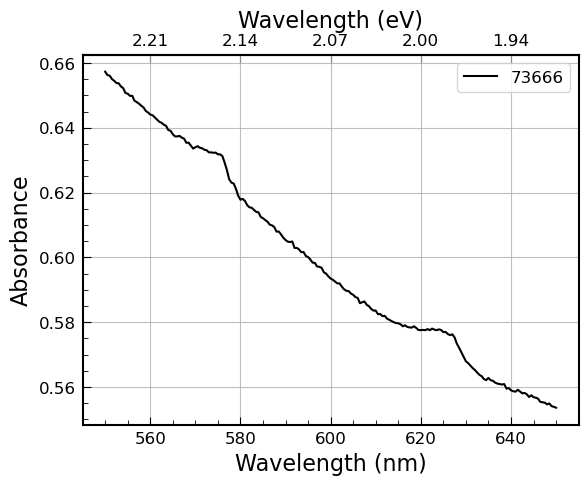

In [19]:
tools.plot_absorbance([spec])

In [23]:
spec.subtract_linear_baseline([(550, 565), (585, 610), (635, 650)])

In [24]:
spec.data

,wavelength,absorbance,raw_absorbance
0,550.0,-0.001313,0.657293
1,550.5,-0.001592,0.656255
2,551.0,-0.001009,0.656080
3,551.5,-0.001316,0.655018
4,552.0,-0.001093,0.654488
...,...,...,...
196,648.0,0.000188,0.554615
197,648.5,0.000775,0.554902
198,649.0,0.000246,0.554074
199,649.5,0.000326,0.553859


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


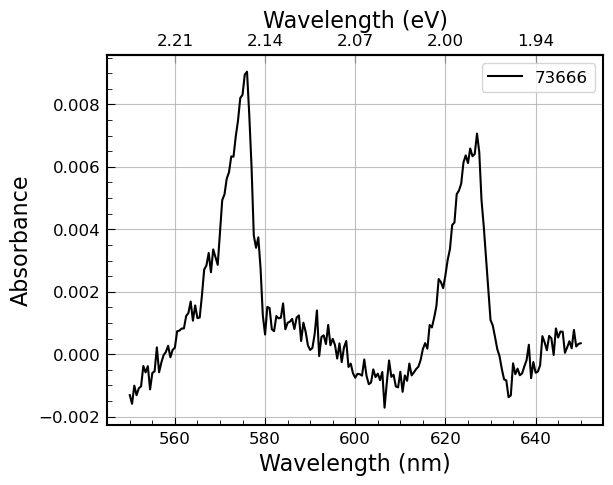

In [25]:
tools.plot_absorbance([spec])